Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import tensorflow as tf

In [2]:
dataset = pd.read_csv("merged.csv")
print(dataset.columns)

Index(['PLAYER_ID', 'PLAYER_NAME', 'SEASON', 'SEASON_NUM', 'AGE',
       'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT', 'GP', 'MIN', 'USG_PCT', 'PACE',
       'POSS', 'FGA_PG', 'DRIVES', 'DRIVE_FGA', 'DRIVE_PASSES', 'DIST_MILES',
       'AVG_SPEED', 'PULL_UP_FGA', 'PULL_UP_FG3A', 'TOUCHES',
       'FRONT_CT_TOUCHES', 'AVG_SEC_PER_TOUCH', 'AVG_DRIB_PER_TOUCH',
       'ELBOW_TOUCHES', 'POST_TOUCHES', 'PAINT_TOUCHES', 'TEAM', 'INJURED ON',
       'RETURNED', 'DAYS MISSED', 'INJURED_TYPE'],
      dtype='object')


Making a dependent variable

In [3]:
list1 = []
for i in range(len(dataset)):
    list1.append(0)
    if(dataset['DAYS MISSED'][i] >0):
        list1[i]=1
    else:
        list1[i]=0
dataset['injured check'] = list1

In [4]:
X = dataset.iloc[:, 3:-6].values
X = X.tolist()
for i in range(len(X)):
    for j in range(len(X[i])):
        if(X[i][j] ==' None'):
            X[i][j] = 0
        if(type(X[i][j]) == str):
            X[i][j] = float(X[i][j])
X = np.array(X)
print(X[14])
y = dataset.iloc[:, -1].values

[2.2500e+01 2.3000e+01 7.6000e+01 2.1000e+02 1.0000e+00 5.3000e+00
 1.4300e-01 1.0481e+02 1.2000e+01 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 4.1000e-01 4.2700e+00 0.0000e+00 0.0000e+00 9.0000e+00
 3.0000e+00 2.7200e+00 2.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Using ANN to predict player getting injured or not

In [7]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))

In [8]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [9]:
ann.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [10]:
ann.fit(X_train, y_train, batch_size= 32, epochs= 100)

Epoch 1/100
140/140 [==============================] - 1s 908us/step - loss: 0.5939 - accuracy: 0.7010
Epoch 2/100
140/140 [==============================] - 0s 904us/step - loss: 0.4637 - accuracy: 0.7766
Epoch 3/100
140/140 [==============================] - 0s 944us/step - loss: 0.4522 - accuracy: 0.7790
Epoch 4/100
140/140 [==============================] - 0s 921us/step - loss: 0.4475 - accuracy: 0.7801
Epoch 5/100
140/140 [==============================] - 0s 920us/step - loss: 0.4447 - accuracy: 0.7819
Epoch 6/100
140/140 [==============================] - 0s 943us/step - loss: 0.4424 - accuracy: 0.7840
Epoch 7/100
140/140 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.7813
Epoch 8/100
140/140 [==============================] - 0s 933us/step - loss: 0.4383 - accuracy: 0.7844
Epoch 9/100
140/140 [==============================] - 0s 979us/step - loss: 0.4364 - accuracy: 0.7875
Epoch 10/100
140/140 [==============================] - 0s 1ms/step - loss:

In [19]:
season_num = float(input("Numeric representation of the season played by the player:"))
age = int(input("Current age of the player:"))
PLAYER_HEIGHT_INCHES = int(input("The height of the player in inches:"))
PLAYER_WEIGHT = int(input("The weight of the player:"))
GP = int(input("the number of games in which the player participated:"))
MIN = float(input("Total minutes played by the player:"))
USG_PCT = float(input("an estimate of the percentage of team plays used by a player while on the court:"))
pace = float(input("The pace of play:"))
poss = int(input("the total number of offensive and defensive possessions:"))
FGA_PG = int(input("Field Goals Attempted per game:"))
DRIVES= float(input("The number of times a player drives towards the basket:"))
DRIVE_FGA =  float(input("Field Goals Attempted on drives:"))
DRIVE_PASSES = float(input("Passes made during drives:"))
DIST_MILES = float(input("Total distance covered by the player in miles:"))
AVG_SPEED = float(input("Average speed of the player in miles per hour:"))
PULL_UP_FGA = float(input("Field Goals Attempted on pull-up shots:"))
PULL_UP_FG3A = float(input("Three-Point Field Goals Attempted on pull-up shots:"))
TOUCHES = float(input("The number of times the player touched the ball:"))
FRONT_CT_TOUCHES = float(input("Front Court Touches - the number of times the player touched the ball in the frontcourt:"))
AVG_SEC_PER_TOUCH = float(input("Average seconds per touch:"))
AVG_DRIB_PER_TOUCH = float(input("Average dribbles per touch:"))
ELBOW_TOUCHES = float(input("The number of times the player touched the ball in the elbow area:"))
POST_TOUCHES = float(input("The number of times the player touched the ball in the post area:"))
PAINT_TOUCHES = float(input("The number of times the player touched the ball in the paint area:"))
TEAM = str(input("The team for which the player played during the specified season:"))
list2 = [season_num,age,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,pace,poss,FGA_PG,DRIVES,DRIVE_FGA,DRIVE_PASSES,DIST_MILES,AVG_SPEED,PULL_UP_FGA,PULL_UP_FG3A,TOUCHES,FRONT_CT_TOUCHES,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES]
print(ann.predict((sc.transform([list2])))>0.5)
if(prediction > 0.5):
    print("Player has a high chance of injury")
else:
    print("Player has low chance of injury")

1/1 [==============================] - 0s 16ms/step
[[False]]


In [12]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

 1/35 [..............................] - ETA: 2s

35/35 [==============================] - 0s 710us/step
[[0 1]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[827  50]
 [153  86]]


0.818100358422939

35/35 [==============================] - 0s 755us/step


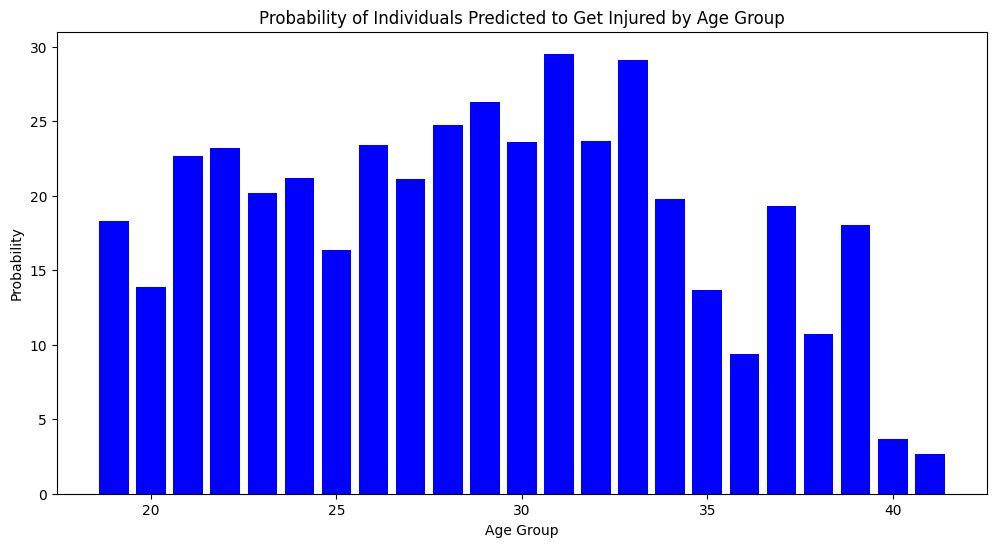

In [17]:
y_pred_proba = ann.predict(X_test)
positive_class_probabilities = y_pred_proba.flatten()
X_test = sc.inverse_transform(X_test)
age_groups = np.unique(X_test[:, 1])
age_percentages = []
for age_group in age_groups:
    age_group_indices = (X_test[:, 1] == age_group)
    average_probability = np.mean(positive_class_probabilities[age_group_indices])
    age_percentages.append((age_group, average_probability * 100))

age_groups, probabilities = zip(*age_percentages)
plt.figure(figsize=(12, 6))
plt.bar(age_groups, probabilities, color='blue')
plt.title('Probability of Individuals Predicted to Get Injured by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Probability')
plt.show()
